In [55]:
import pandas as pd
import numpy as np
import warnings 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sn
warnings.filterwarnings('ignore')
x=pd.read_csv('Parkinsson disease.csv')
x

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [57]:
x.drop(x[['name']],axis=1,inplace=True)

In [59]:
x.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [61]:
x.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [63]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

In [65]:
x.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [67]:
x.isnull().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [69]:
a=x.corr()
a

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


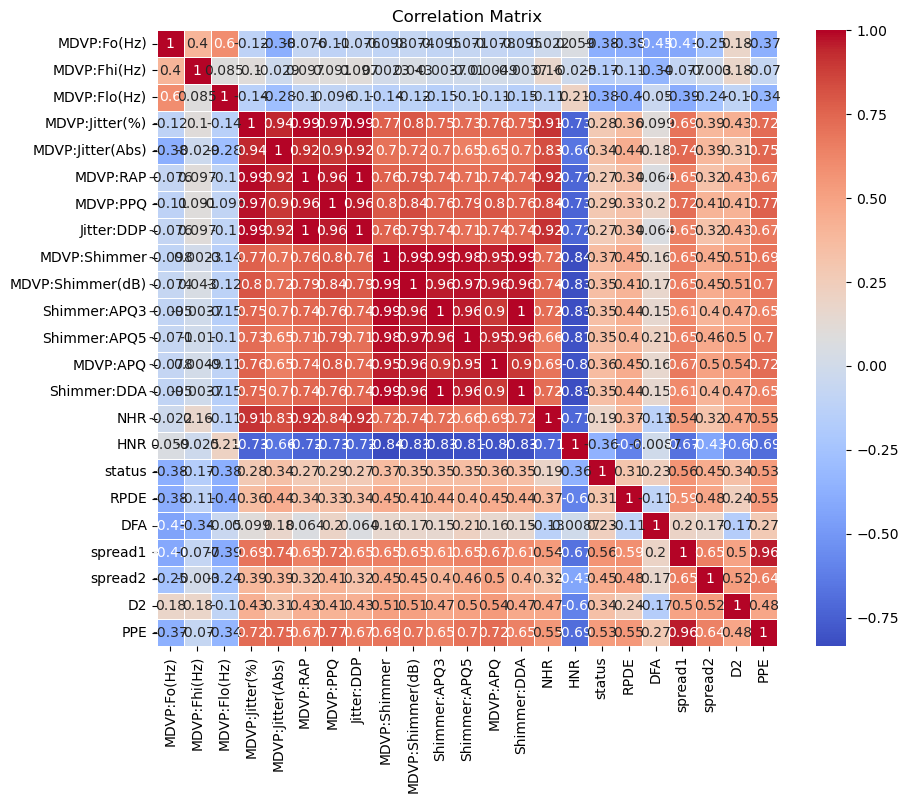

In [71]:
plt.figure(figsize=(10, 8))
sn.heatmap(a, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

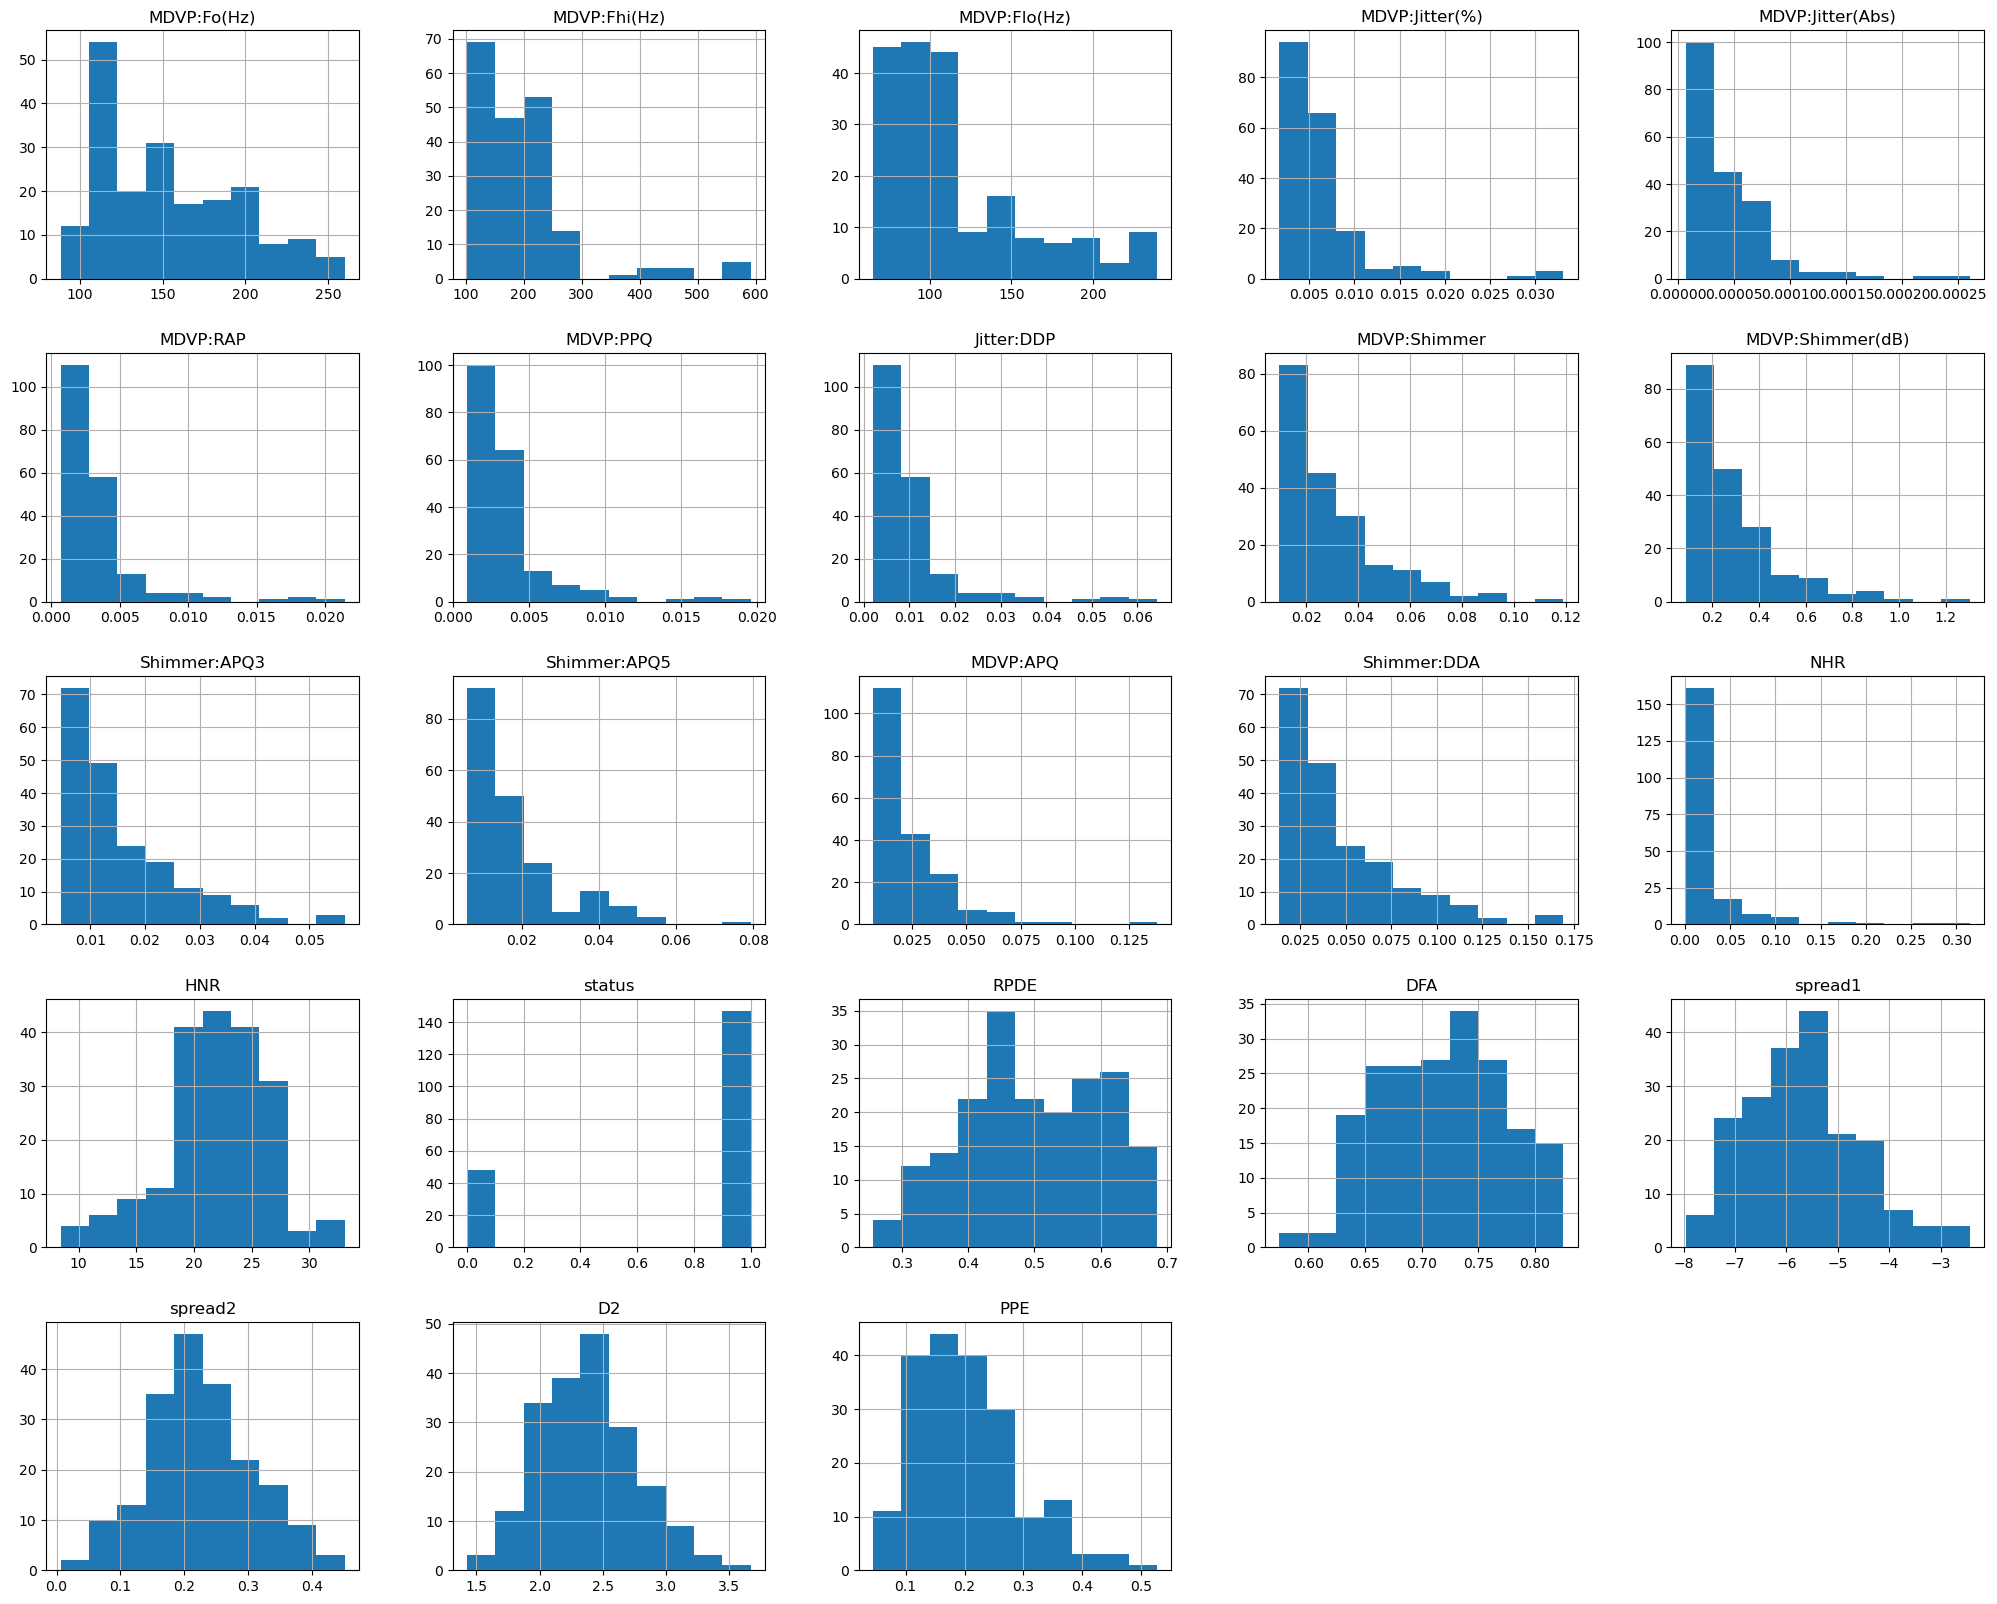

In [120]:
x.hist(figsize=(25,20));

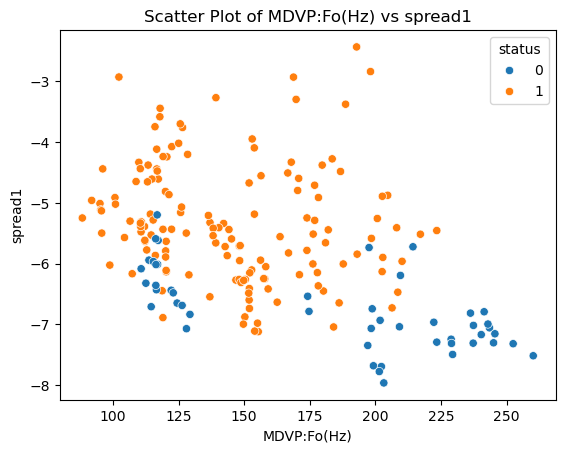

In [151]:
sn.scatterplot(x='MDVP:Fo(Hz)', y='spread1', hue='status', data=x)
plt.xlabel('MDVP:Fo(Hz)')
plt.ylabel('spread1')
plt.title('Scatter Plot of MDVP:Fo(Hz) vs spread1')
plt.show()

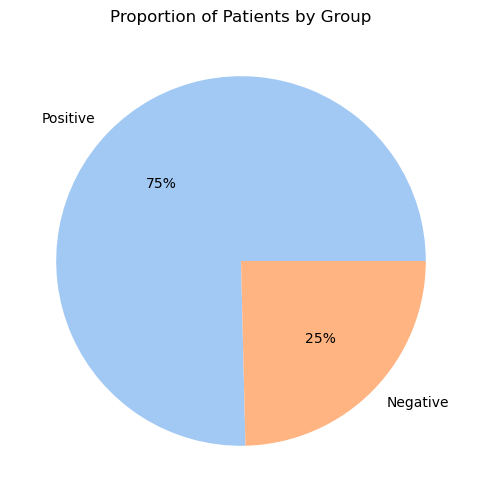

In [132]:
plt.figure(figsize=[6,6])
y=x["status"].value_counts(normalize=True)
colors=sn.color_palette('pastel')
labels = ["Positive","Negative",]
plt.pie(y,labels=labels,colors=colors, autopct='%.0f%%')
plt.title("Proportion of Patients by Group")
plt.show()

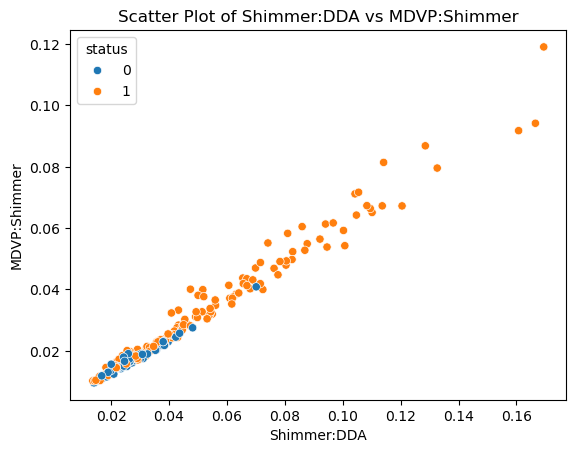

In [138]:
sn.scatterplot(x=x['Shimmer:DDA'],y=x['MDVP:Shimmer'],hue=x['status'])
plt.xlabel('Shimmer:DDA') 
plt.ylabel('MDVP:Shimmer') 
plt.title('Scatter Plot of Shimmer:DDA vs MDVP:Shimmer') 
plt.show()

<Axes: xlabel='status', ylabel='count'>

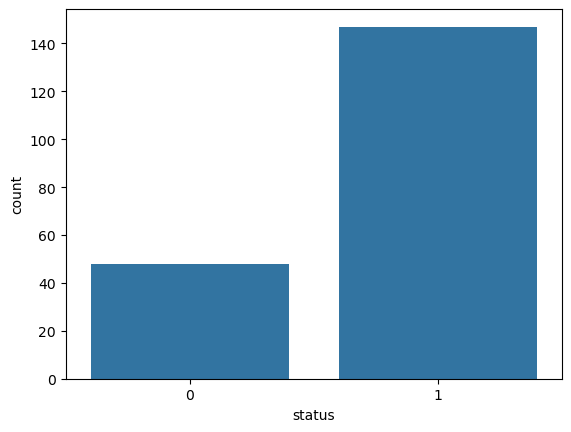

In [157]:
sn.countplot(x='status',data=x)

In [73]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [75]:
x['status'].unique()

array([1, 0], dtype=int64)

In [77]:
from sklearn.model_selection import train_test_split
a=x.drop(['status'],axis=1)
b=x.status
x_train,x_test,y_train,y_test=train_test_split(a,b,train_size=0.9,random_state=42)

# Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [81]:
lrp=lr.predict(x_test)
lrp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [83]:
lrs=lr.score(x_test,y_test)
lrs

0.9

Precision Score

In [165]:
from sklearn.metrics import precision_score
ps=precision_score(lrp,y_test)
ps

1.0

Recall Score

In [93]:
from sklearn.metrics import recall_score
re=recall_score(y_test, lrp)
re

1.0

F1 Score

In [96]:
from sklearn.metrics import f1_score
fs=f1_score(y_test, lrp)
fs

0.9473684210526315

AUC

In [114]:
auc=roc_auc_score(y_test,lrp)
auc

0.5

ROC Curve

In [111]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr,tpr,thresholds=roc_curve(y_test,lrp)
fpr,tpr,thresholds

(array([0., 1.]), array([0., 1.]), array([inf,  1.]))

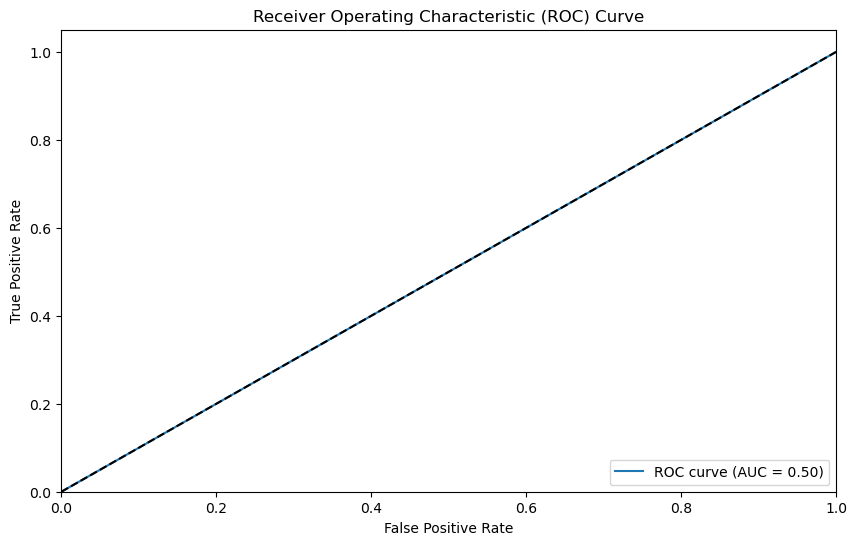

In [118]:
plt.figure(figsize=(10, 6)) 
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})') 
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver Operating Characteristic (ROC) Curve') 
plt.legend(loc='lower right')
plt.show()

CONFUSION MATRIX

<Figure size 2000x700 with 0 Axes>

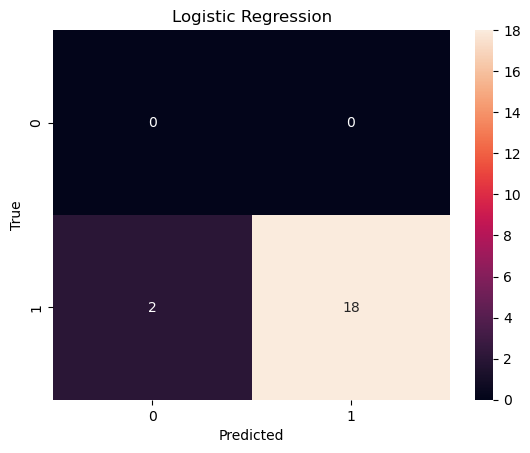

<Figure size 2000x700 with 0 Axes>

In [124]:
cm=confusion_matrix(lrp,y_test)
sn.heatmap(cm,annot=True)
plt.title('Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.figure(figsize=(20,7))

# Decision Tree

In [170]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [172]:
dtp=dt.predict(x_test)
dtp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1],
      dtype=int64)

In [174]:
dts=dt.score(x_test,y_test)
dts

0.9

In [176]:
ps=precision_score(dtp,y_test)
ps

0.9444444444444444

In [178]:
re=recall_score(y_test,dtp)
re

0.9444444444444444

In [180]:
fs=f1_score(y_test,dtp)
fs

0.9444444444444444

In [182]:
auc=roc_auc_score(y_test,dtp)
auc

0.7222222222222222

In [186]:
fpr,tpr,thresholds=roc_curve(y_test,dtp)
fpr,tpr,thresholds

(array([0. , 0.5, 1. ]),
 array([0.        , 0.94444444, 1.        ]),
 array([inf,  1.,  0.]))

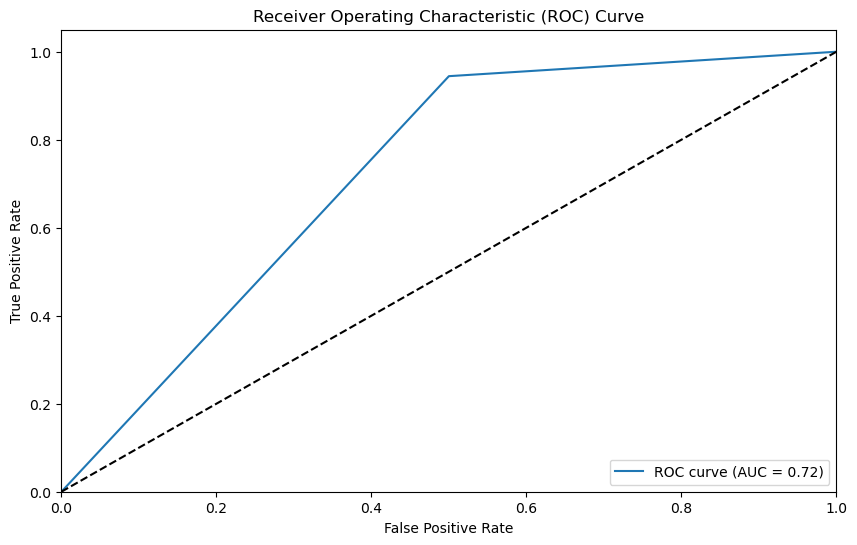

In [188]:
plt.figure(figsize=(10, 6)) 
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})') 
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver Operating Characteristic (ROC) Curve') 
plt.legend(loc='lower right')
plt.show()

<Figure size 2000x700 with 0 Axes>

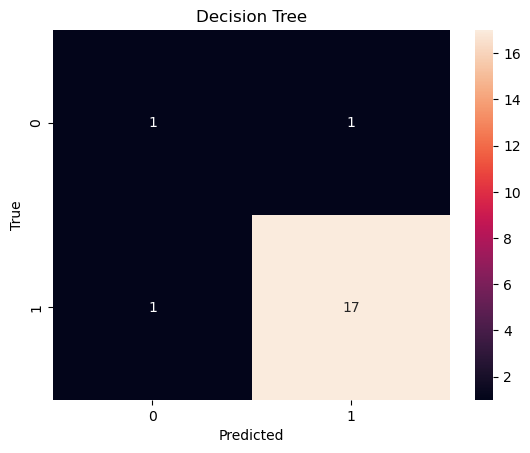

<Figure size 2000x700 with 0 Axes>

In [371]:
cm=confusion_matrix(dtp,y_test)
sn.heatmap(cm,annot=True)
plt.title('Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.figure(figsize=(20,7))

# Random Forest

In [194]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [196]:
rfp=rf.predict(x_test)
rfp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
      dtype=int64)

In [198]:
rfs=rf.score(x_test,y_test)
rfs

0.9

In [200]:
ps=precision_score(rfp,y_test)
ps

0.9444444444444444

In [202]:
re=recall_score(y_test,rfp)
re

0.9444444444444444

In [204]:
fs=f1_score(y_test,rfp)
fs

0.9444444444444444

In [206]:
auc=roc_auc_score(y_test,rfp)
auc

0.7222222222222222

In [208]:
fpr,tpr,thresholds=roc_curve(y_test,rfp)
fpr,tpr,thresholds

(array([0. , 0.5, 1. ]),
 array([0.        , 0.94444444, 1.        ]),
 array([inf,  1.,  0.]))

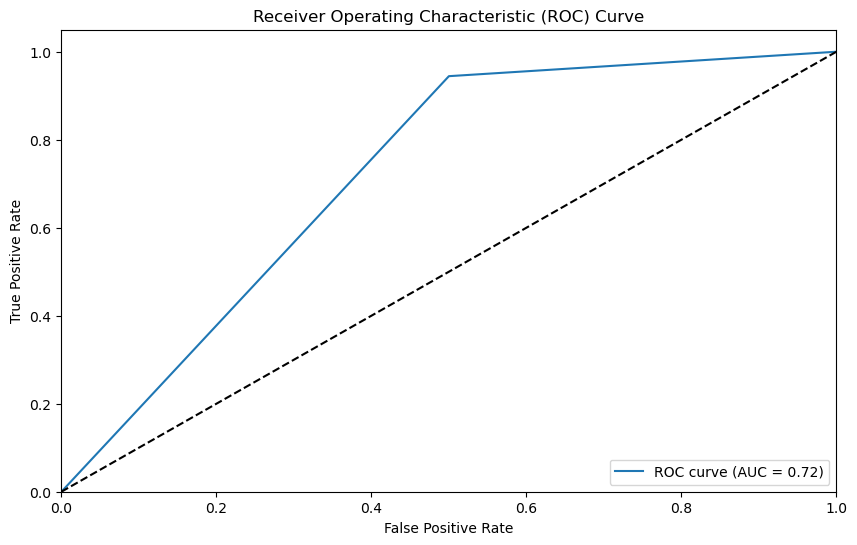

In [210]:
plt.figure(figsize=(10, 6)) 
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})') 
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver Operating Characteristic (ROC) Curve') 
plt.legend(loc='lower right')
plt.show()

<Figure size 2000x700 with 0 Axes>

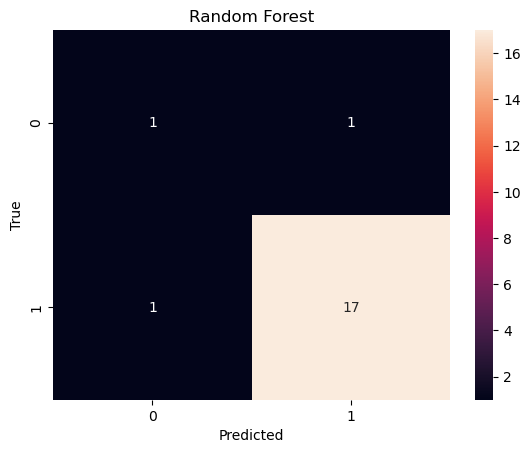

<Figure size 2000x700 with 0 Axes>

In [212]:
cm=confusion_matrix(rfp,y_test)
sn.heatmap(cm,annot=True)
plt.title('Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.figure(figsize=(20,7))

# NAIVE BAYES

Naive Bayes is a family of simple yet powerful classification algorithms based on Bayes' Theorem.
The Gaussian Naive Bayes variant assumes that the features follow a normal (Gaussian) distribution.
It's widely used in text classification, spam detection, sentiment analysis, and medical diagnosis due
to its simplicity and efficiency.

In [215]:
from sklearn.naive_bayes import GaussianNB
nbg=GaussianNB()
nbg.fit(x_train,y_train)

GaussianNB()

In [217]:
nbgp=nbg.predict(x_test)
nbgp

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0],
      dtype=int64)

In [219]:
nbgs=nbg.score(x_test,y_test)
nbgs

0.7

In [221]:
ps=precision_score(nbgp,y_test)
ps

0.7222222222222222

In [223]:
re=recall_score(y_test,nbgp)
re

0.7222222222222222

In [225]:
fs=f1_score(y_test,nbgp)
fs

0.8125

In [227]:
auc=roc_auc_score(y_test,nbgp)
auc

0.6111111111111112

In [229]:
fpr,tpr,thresholds=roc_curve(y_test,nbgp)
fpr,tpr,thresholds

(array([0. , 0.5, 1. ]),
 array([0.        , 0.72222222, 1.        ]),
 array([inf,  1.,  0.]))

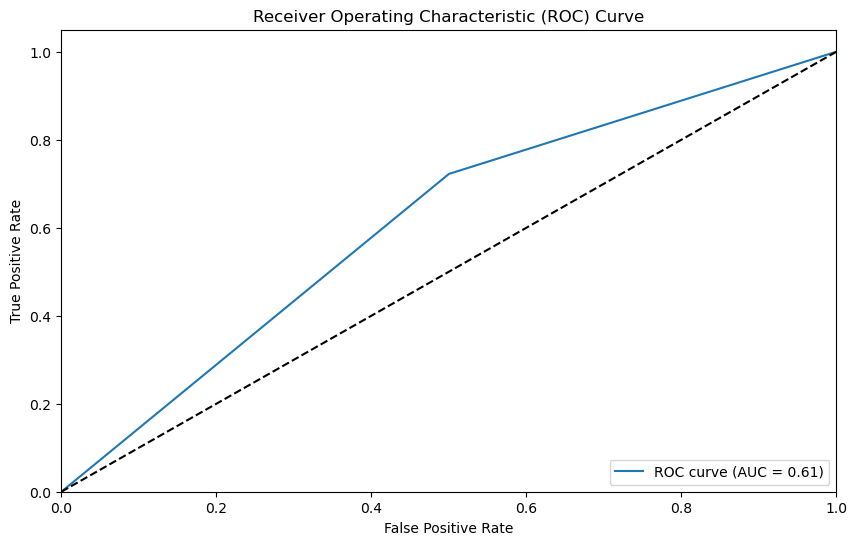

In [231]:
plt.figure(figsize=(10, 6)) 
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})') 
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver Operating Characteristic (ROC) Curve') 
plt.legend(loc='lower right')
plt.show()

<Figure size 2000x700 with 0 Axes>

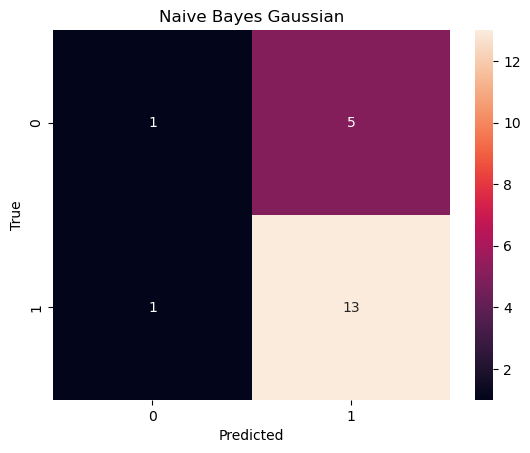

<Figure size 2000x700 with 0 Axes>

In [233]:
cm=confusion_matrix(nbgp,y_test)
sn.heatmap(cm,annot=True)
plt.title('Naive Bayes Gaussian')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.figure(figsize=(20,7))

In [235]:
from sklearn.naive_bayes import BernoulliNB
nbb=BernoulliNB()
nbb.fit(x_train,y_train)

BernoulliNB()

In [237]:
nbbp=nbb.predict(x_test)
nbbp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [239]:
nbbs=nbb.score(x_test,y_test)
nbbs

0.9

In [241]:
ps=precision_score(nbbp,y_test)
ps

1.0

In [243]:
re=recall_score(y_test,nbbp)
re

1.0

In [245]:
fs=f1_score(y_test,nbbp)
fs

0.9473684210526315

In [247]:
auc=roc_auc_score(y_test,nbbp)
auc

0.5

In [249]:
fpr,tpr,thresholds=roc_curve(y_test,nbbp)
fpr,tpr,thresholds

(array([0., 1.]), array([0., 1.]), array([inf,  1.]))

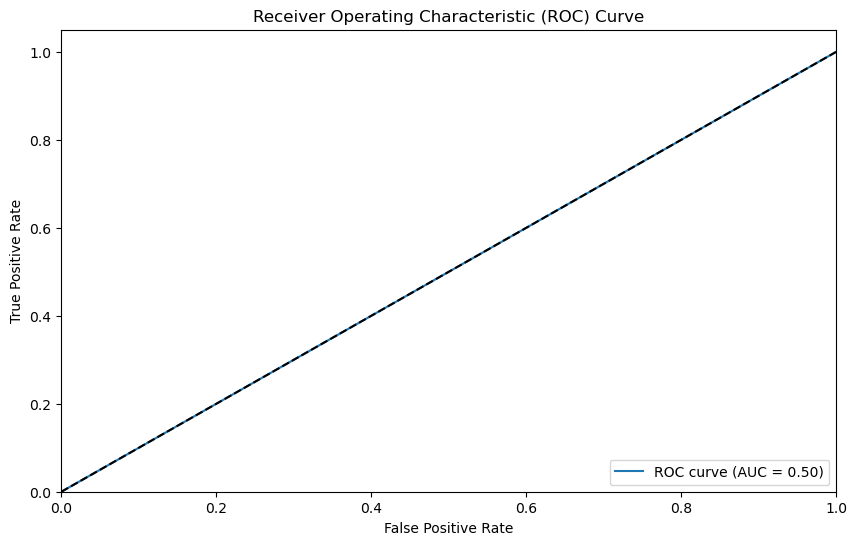

In [251]:
plt.figure(figsize=(10, 6)) 
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})') 
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver Operating Characteristic (ROC) Curve') 
plt.legend(loc='lower right')
plt.show()

<Figure size 2000x700 with 0 Axes>

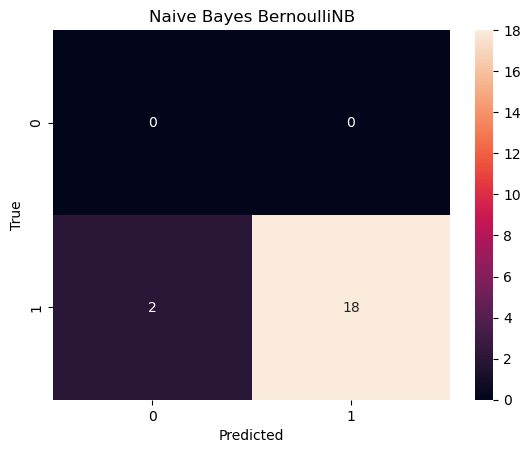

<Figure size 2000x700 with 0 Axes>

In [369]:
cm=confusion_matrix(nbbp,y_test)
sn.heatmap(cm,annot=True)
plt.title('Naive Bayes BernoulliNB')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.figure(figsize=(20,7))

# S V M

In [257]:
from sklearn.svm import SVC
svl=SVC(kernel='linear')
svl.fit(x_train,y_train)

SVC(kernel='linear')

In [259]:
svlp=svl.predict(x_test)
svlp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [88]:
svls=svl.score(x_test,y_test)
svls

0.9

In [261]:
ps=precision_score(svlp,y_test)
ps

1.0

In [263]:
re=recall_score(y_test,svlp)
re

1.0

In [265]:
fs=f1_score(y_test,svlp)
fs

0.9473684210526315

In [267]:
auc=roc_auc_score(y_test,svlp)
auc

0.5

In [269]:
fpr,tpr,thresholds=roc_curve(y_test,svlp)
fpr,tpr,thresholds

(array([0., 1.]), array([0., 1.]), array([inf,  1.]))

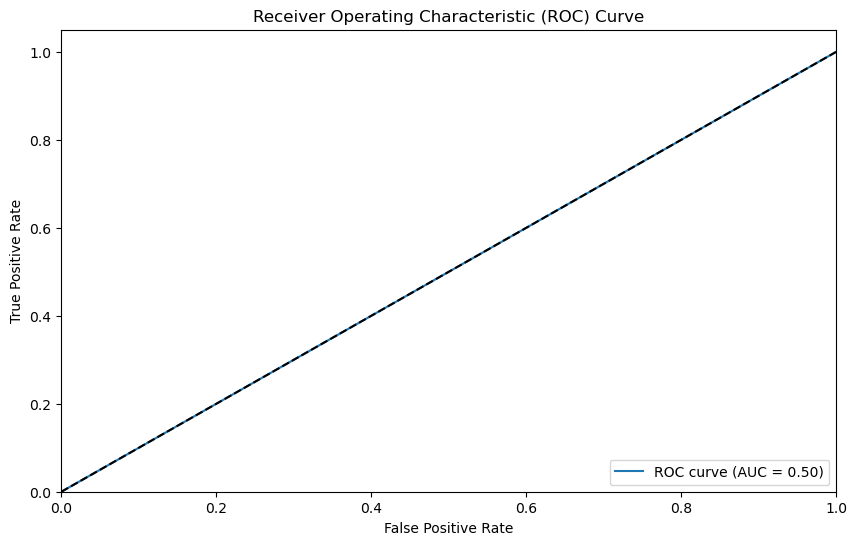

In [271]:
plt.figure(figsize=(10, 6)) 
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})') 
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver Operating Characteristic (ROC) Curve') 
plt.legend(loc='lower right')
plt.show()

<Figure size 2000x700 with 0 Axes>

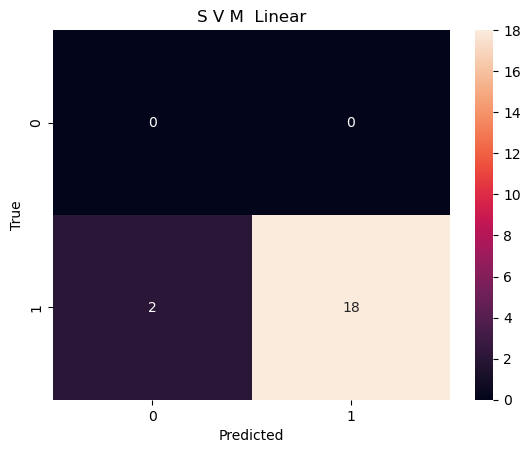

<Figure size 2000x700 with 0 Axes>

In [273]:
cm=confusion_matrix(svlp,y_test)
sn.heatmap(cm,annot=True)
plt.title('S V M  Linear')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.figure(figsize=(20,7))

In [275]:
svp=SVC(kernel='poly')
svp.fit(x_train,y_train)

SVC(kernel='poly')

In [277]:
svpp=svp.predict(x_test)
svpp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
      dtype=int64)

In [281]:
svps=svp.score(x_test,y_test)
svps

0.8

In [283]:
ps=precision_score(svpp,y_test)
ps

0.8888888888888888

In [289]:
re=recall_score(y_test,svpp)
re

0.8888888888888888

In [287]:
fs=f1_score(y_test,svpp)
fs

0.8888888888888888

In [291]:
auc=roc_auc_score(y_test,svpp)
auc

0.4444444444444444

In [293]:
fpr,tpr,thresholds=roc_curve(y_test,svpp)
fpr,tpr,thresholds

(array([0., 1., 1.]),
 array([0.        , 0.88888889, 1.        ]),
 array([inf,  1.,  0.]))

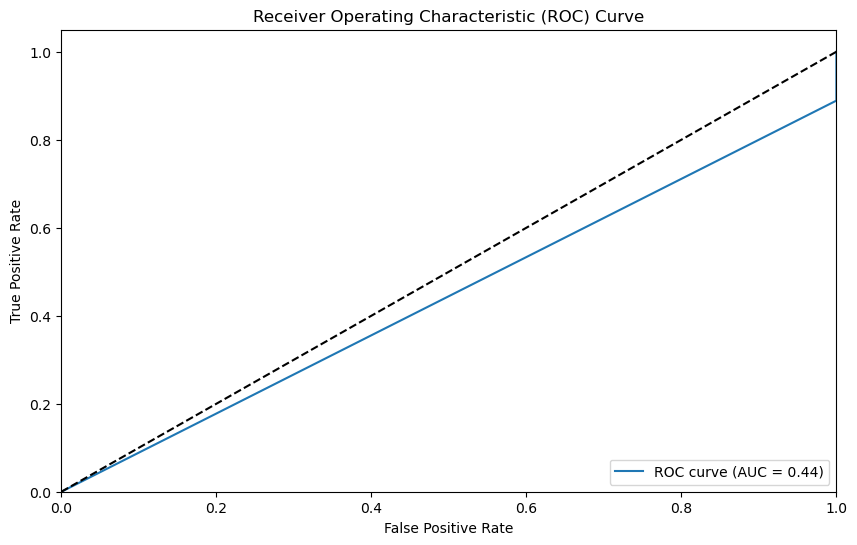

In [295]:
plt.figure(figsize=(10, 6)) 
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})') 
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver Operating Characteristic (ROC) Curve') 
plt.legend(loc='lower right')
plt.show()

<Figure size 2000x700 with 0 Axes>

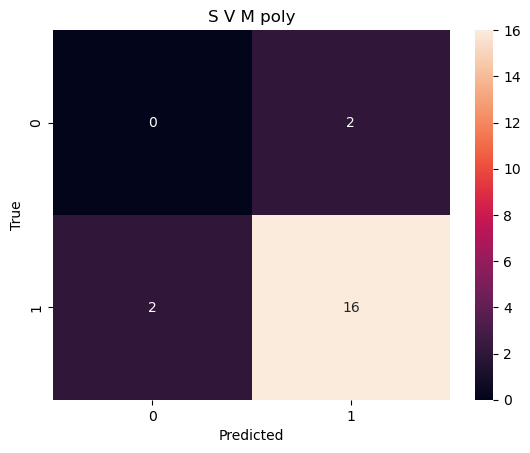

<Figure size 2000x700 with 0 Axes>

In [297]:
cm=confusion_matrix(svpp,y_test)
sn.heatmap(cm,annot=True)
plt.title('S V M poly')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.figure(figsize=(20,7))

In [299]:
svr=SVC(kernel='rbf')
svr.fit(x_train,y_train)

SVC()

In [301]:
svrp=svr.predict(x_test)
svrp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
      dtype=int64)

In [303]:
svrs=svr.score(x_test,y_test)
svrs

0.8

In [305]:
ps=precision_score(svrp,y_test)
ps

0.8888888888888888

In [307]:
re=recall_score(y_test,svrp)
re

0.8888888888888888

In [309]:
fs=f1_score(y_test,svrp)
fs

0.8888888888888888

In [311]:
auc=roc_auc_score(y_test,svrp)
auc

0.4444444444444444

In [313]:
fpr,tpr,thresholds=roc_curve(y_test,svrp)
fpr,tpr,thresholds

(array([0., 1., 1.]),
 array([0.        , 0.88888889, 1.        ]),
 array([inf,  1.,  0.]))

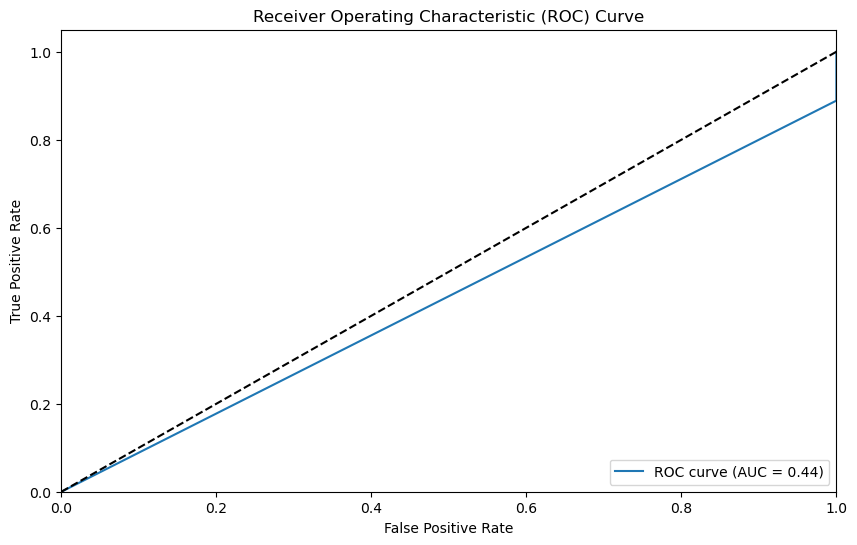

In [315]:
plt.figure(figsize=(10, 6)) 
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})') 
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver Operating Characteristic (ROC) Curve') 
plt.legend(loc='lower right')
plt.show()

<Figure size 2000x700 with 0 Axes>

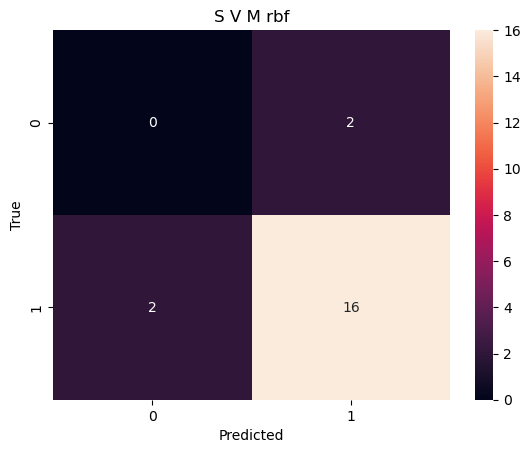

<Figure size 2000x700 with 0 Axes>

In [317]:
cm=confusion_matrix(svrp,y_test)
sn.heatmap(cm,annot=True)
plt.title('S V M rbf')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.figure(figsize=(20,7))

# X G Boost

In [319]:
from xgboost import XGBClassifier
xg=XGBClassifier()
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [321]:
xgp=xg.predict(x_test)
xgp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [323]:
xgs=xg.score(x_test,y_test)
xgs

0.9

In [327]:
ps=precision_score(xgp,y_test)
ps

0.9444444444444444

In [329]:
re=recall_score(y_test,xgp)
re

0.9444444444444444

In [331]:
fs=f1_score(y_test,xgp)
fs

0.9444444444444444

In [333]:
auc=roc_auc_score(y_test,xgp)
auc

0.7222222222222222

In [335]:
fpr,tpr,thresholds=roc_curve(y_test,xgp)
fpr,tpr,thresholds

(array([0. , 0.5, 1. ]),
 array([0.        , 0.94444444, 1.        ]),
 array([inf,  1.,  0.]))

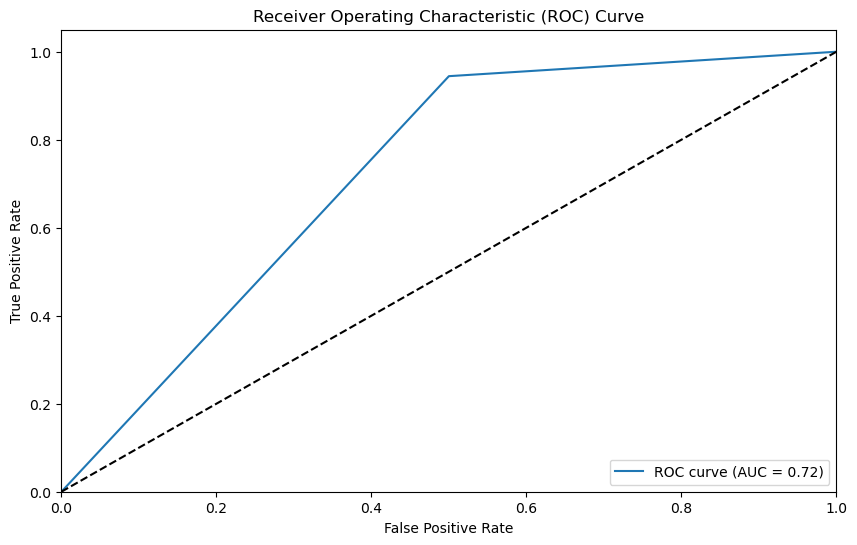

In [337]:
plt.figure(figsize=(10, 6)) 
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})') 
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver Operating Characteristic (ROC) Curve') 
plt.legend(loc='lower right')
plt.show()

<Figure size 2000x700 with 0 Axes>

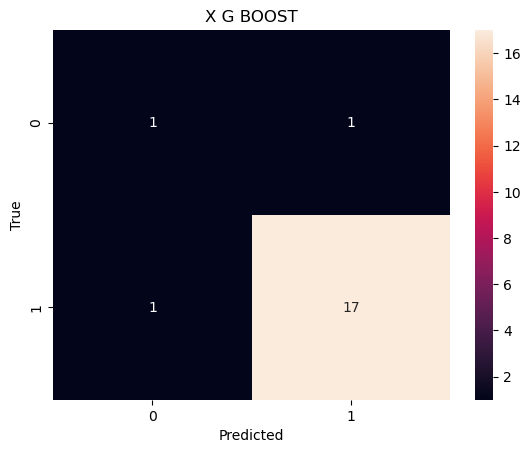

<Figure size 2000x700 with 0 Axes>

In [341]:
cm=confusion_matrix(xgp,y_test)
sn.heatmap(cm,annot=True)
plt.title('X G BOOST')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.figure(figsize=(20,7))

# K N N

In [343]:
from sklearn.neighbors import KNeighborsClassifier

Text(0, 0.5, 'Accuracy')

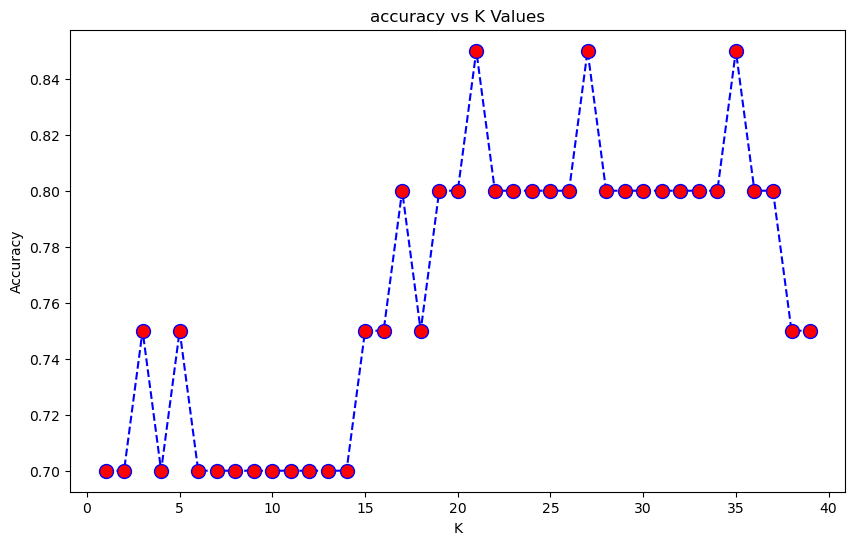

In [345]:
accuracy=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    score=knn.score(x_test,y_test)
    accuracy.append(score)
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('accuracy vs K Values')
plt.xlabel('K')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Error Rate')

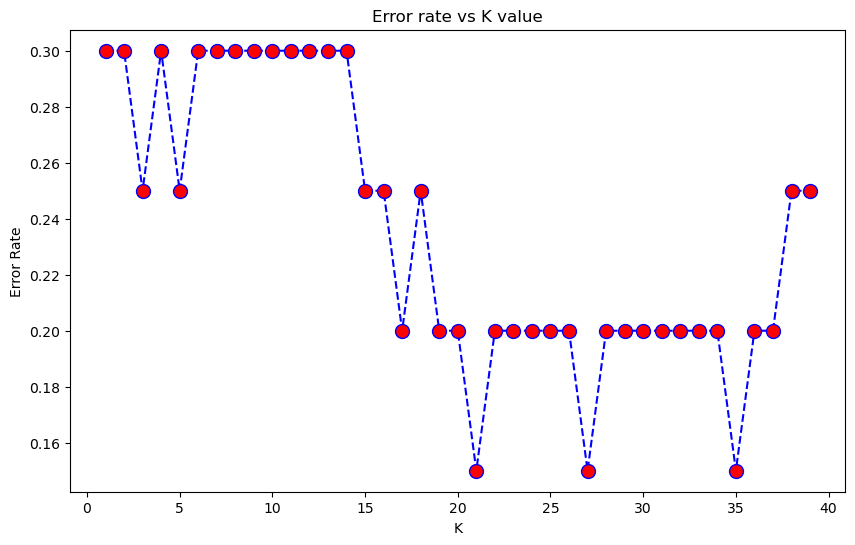

In [347]:
error=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred=knn.predict(x_test)
    error.append(np.mean(pred != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error,color='blue',linestyle='dashed',marker='o',
         markerfacecolor='red',markersize=10)
plt.title('Error rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [349]:
knn=KNeighborsClassifier(n_neighbors=21) 
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=21)

In [351]:
knp=knn.predict(x_test)
knp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [353]:
kns=knn.score(x_test,y_test)
kns

0.85

In [355]:
ps=precision_score(knp,y_test)
ps

0.9444444444444444

In [357]:
re=recall_score(y_test,knp)
re

0.9444444444444444

In [359]:
fs=f1_score(y_test,knp)
fs

0.918918918918919

In [361]:
auc=roc_auc_score(y_test,knp)
auc

0.4722222222222222

In [363]:
fpr,tpr,thresholds=roc_curve(y_test,knp)
fpr,tpr,thresholds

(array([0., 1., 1.]),
 array([0.        , 0.94444444, 1.        ]),
 array([inf,  1.,  0.]))

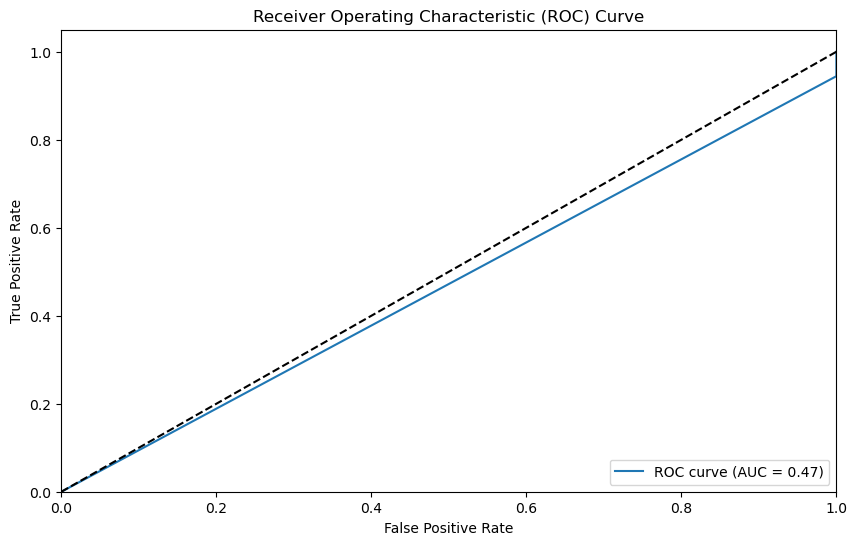

In [365]:
plt.figure(figsize=(10, 6)) 
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})') 
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver Operating Characteristic (ROC) Curve') 
plt.legend(loc='lower right')
plt.show()

<Figure size 2000x700 with 0 Axes>

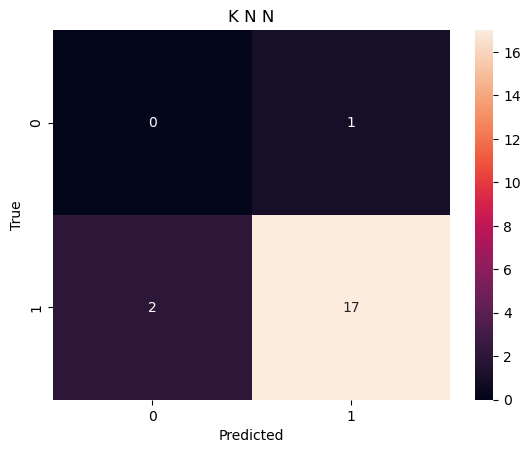

<Figure size 2000x700 with 0 Axes>

In [367]:
cm=confusion_matrix(knp,y_test)
sn.heatmap(cm,annot=True)
plt.title('K N N')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.figure(figsize=(20,7))

In [373]:
x.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [375]:
p=[[119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.0313,0.02971,0.06545,0.02211,21.033,
    0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654]]
new_data_predicted=rf.predict(p)
new_data_predicted

array([1], dtype=int64)